In [25]:
#Chekpoint regression


import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
df=pd.read_csv(r"C:\Users\linag\Downloads\kc_house_data.csv",sep=',', encoding='ISO-8859-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df.isnull().sum().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [28]:
#creating new column (house age)
date=[]
for i in range (len(df)):
    date.append(int(str(df['date'][i])[:4]))
df['date']=date
df['age']=df['date']-df['yr_built']

#creating new column (last renovation)
dr_reno=[]
for i in range (len(df)):
    if (df['yr_renovated'][i]==0):
        dr_reno.append(int(str(df['yr_built'][i])[:4]))
    else:
        dr_reno.append(int(str(df['yr_renovated'][i])[:4]))
        
df['dr_reno']=dr_reno


df.drop(['id','yr_built','date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,dr_reno
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,59,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,63,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,82,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,49,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,28,1987


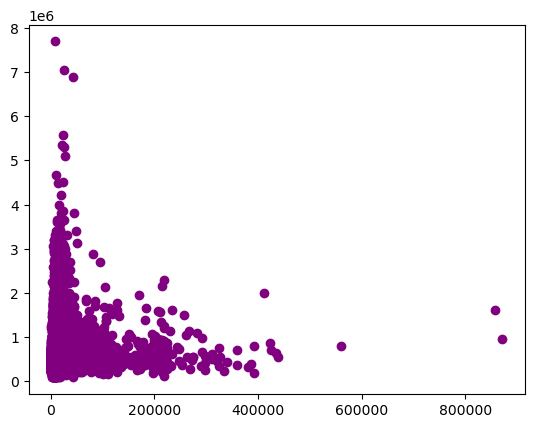

In [29]:
#Data Visiualisation
plt.scatter(df['sqft_lot15'],df['price'],color='Purple')

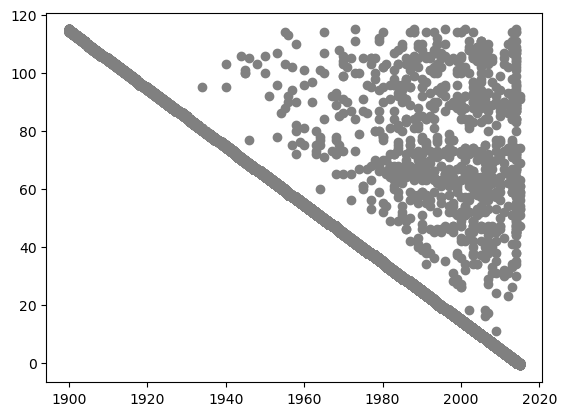

In [30]:
plt.scatter(df['dr_reno'],df['age'], color='Grey')

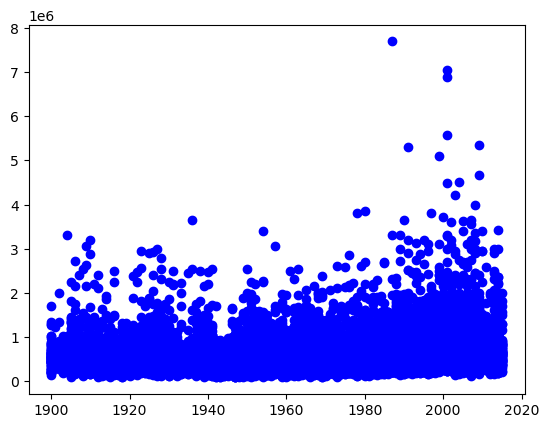

In [31]:
plt.scatter(df['dr_reno'],df['price'], color='blue')

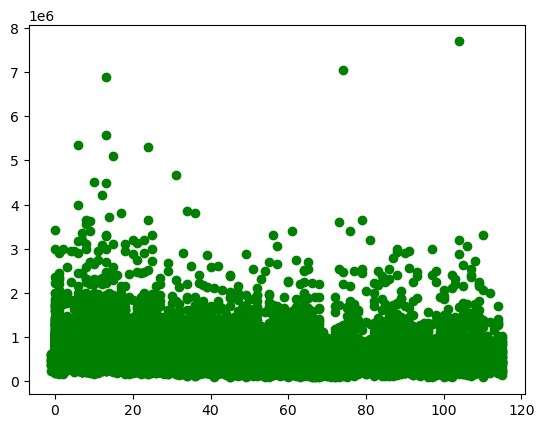

In [32]:
plt.scatter(df['age'],df['price'], color='green')

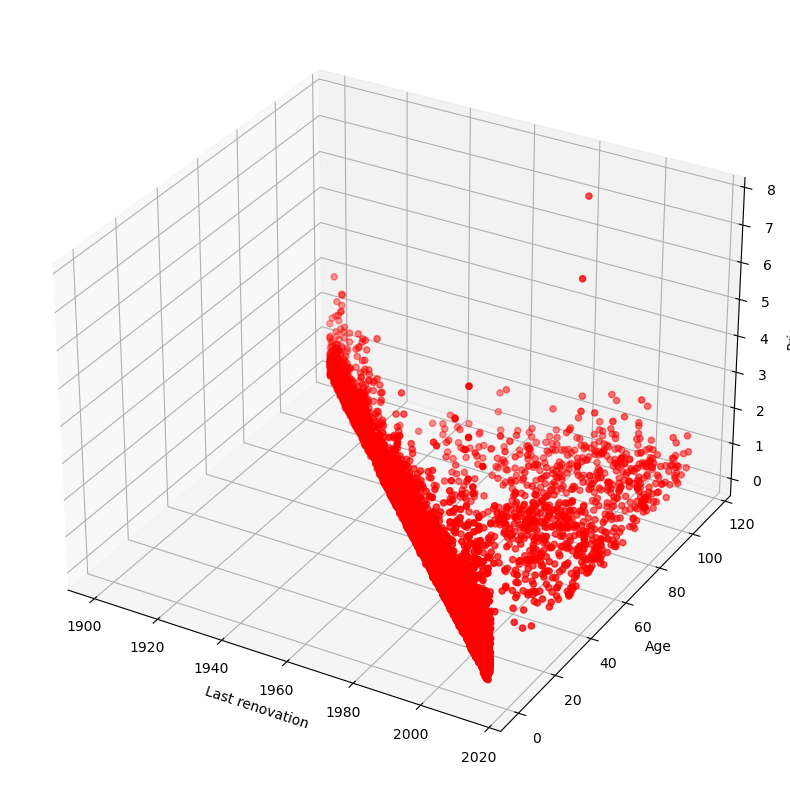

In [33]:
from mpl_toolkits.mplot3d import Axes3D

figg=plt.figure(figsize=(12, 10))
axx= figg.add_subplot(111, projection='3d')

axx.scatter(df['dr_reno'], df['age'],df['price'], color='red')
axx.set_xlabel('Last renovation')
axx.set_ylabel('Age')
axx.set_zlabel('Price')

plt.show()

<Axes: xlabel='grade', ylabel='count'>

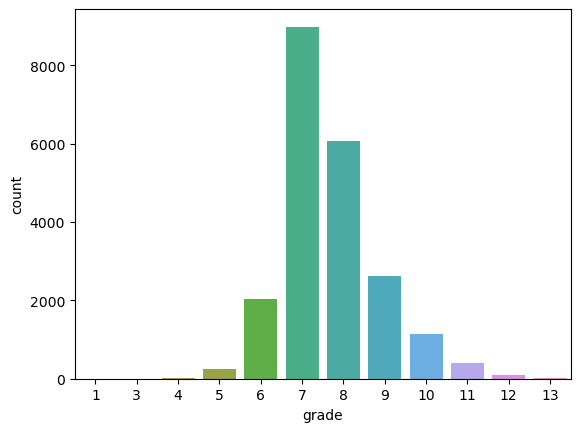

In [34]:
sns.countplot(x='grade', data=df)

<Axes: xlabel='sqft_living'>

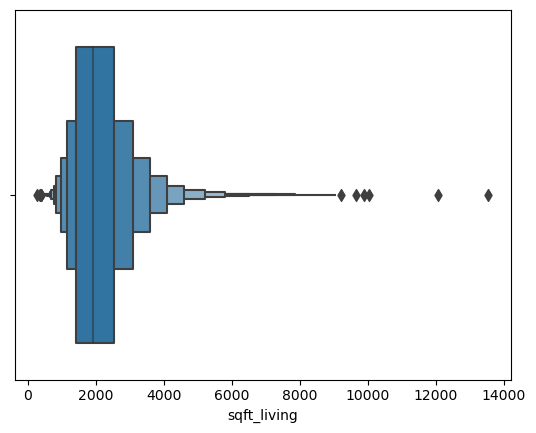

In [35]:
sns.boxenplot(x= "sqft_living", data = df)

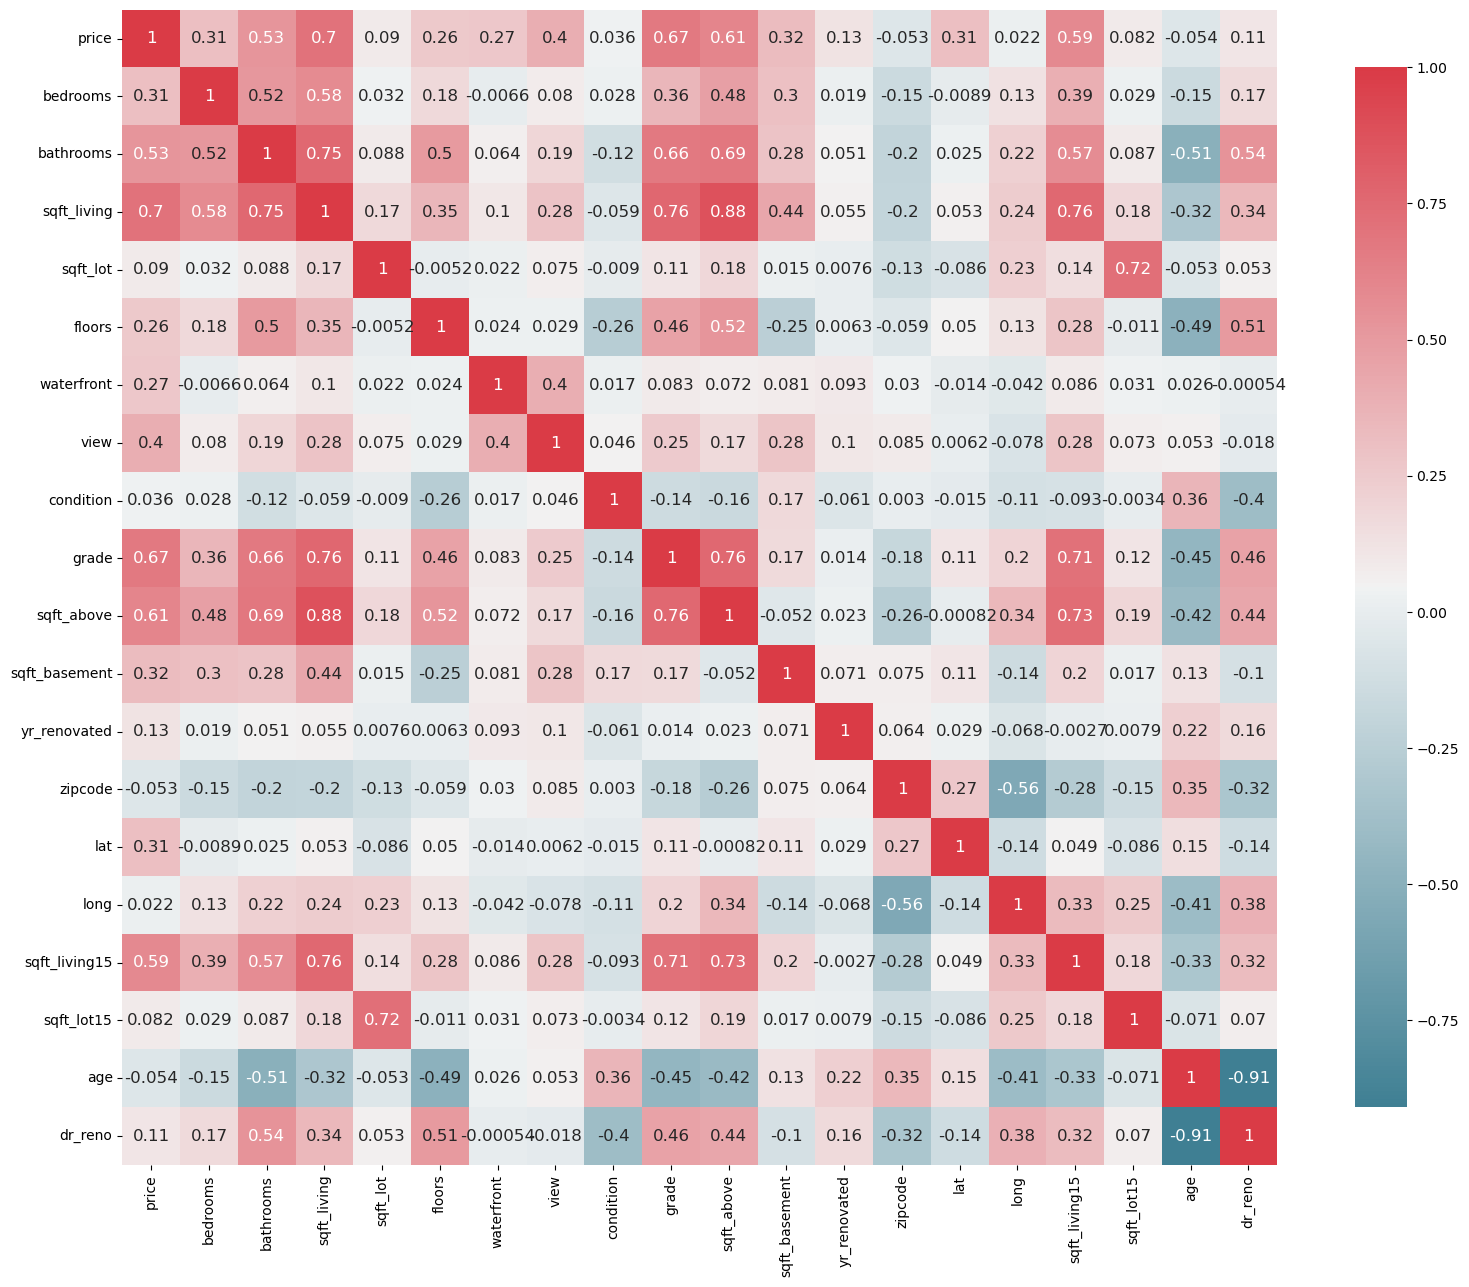

In [36]:
def plot_correlation_map(df):
    corr = df.corr()
    s, ax = plt.subplots(figsize =(20, 15))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={'shrink': 0.9 },
        ax=ax,
        annot = True,
        annot_kws = {'fontsize': 12}
        )
plot_correlation_map(df)
plt.show()

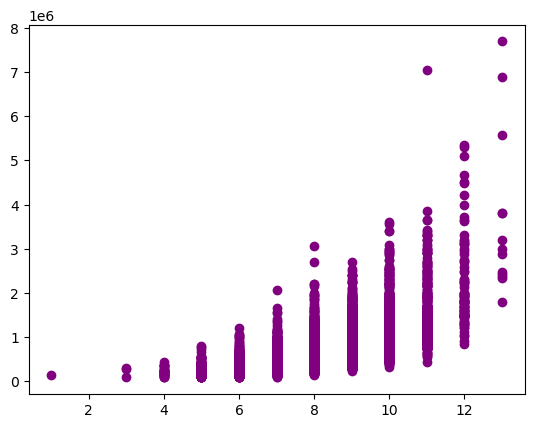

In [37]:
plt.scatter(df['grade'],df['price'],color='Purple')

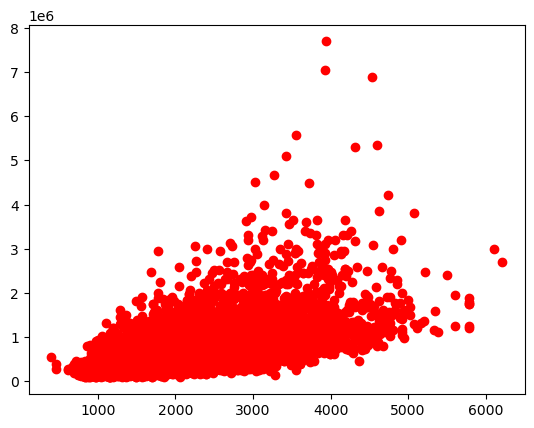

In [38]:
plt.scatter(df['sqft_living15'],df['price'],color='Red')

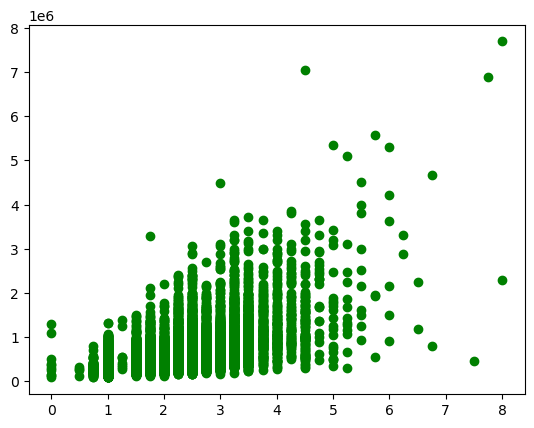

In [39]:
plt.scatter(df['bathrooms'],df['price'],color='Green')

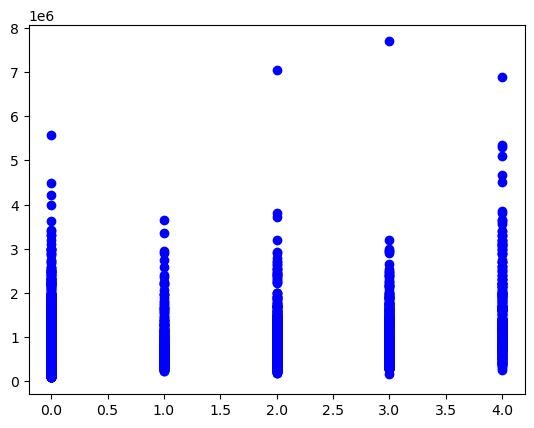

In [40]:
plt.scatter(df['view'],df['price'],color='blue')

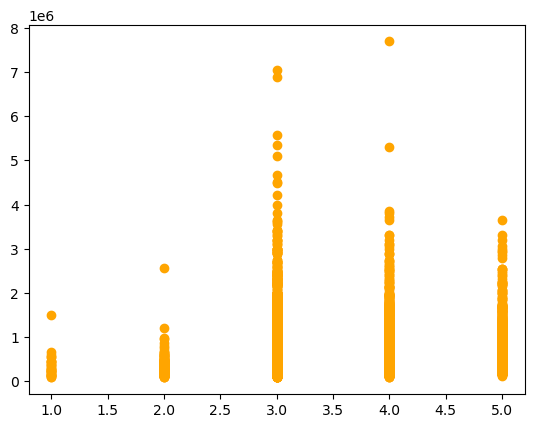

In [41]:
plt.scatter(df['condition'],df['price'],color='orange')

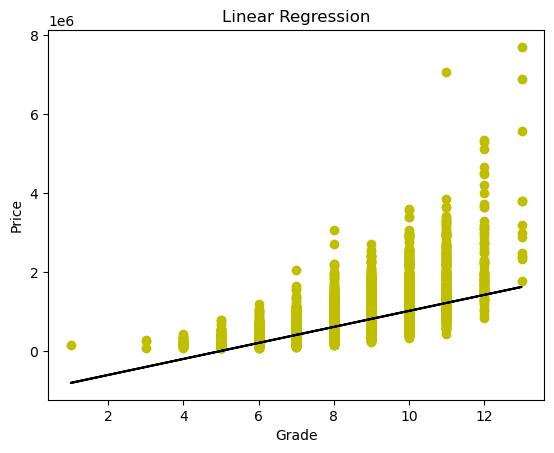

MSE : GP 80902259332.75977
R squared : GP 0.4475695680458581


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

data = df
x=data["grade"].values[:,np.newaxis]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=45)

GP=LinearRegression()
GP.fit(x_train,y_train)
predicted=GP.predict(x_test)

plt.scatter(x,y,color="y")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Grade")
plt.plot(x,GP.predict(x),color="k")
plt.show()

print("MSE : GP", mean_squared_error(y_test,predicted))
print("R squared : GP", metrics.r2_score(y_test,predicted))

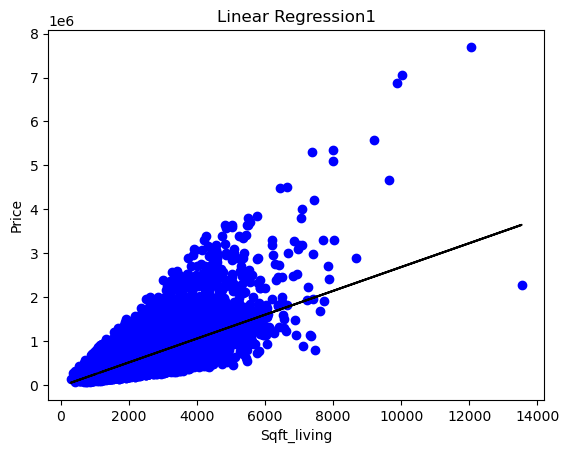

MSE : SQP 73003527587.22871
R squared : SQP 0.5015050183789083


In [25]:
x1=data["sqft_living"].values[:,np.newaxis]
y1=data["price"].values

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.45,random_state=45)

SP=LinearRegression()
SP.fit(x1_train,y1_train)
predicted=SP.predict(x1_test)

plt.scatter(x1,y1,color="b")
plt.title("Linear Regression1")
plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.plot(x1,SP.predict(x1),color="k")
plt.show()

print("MSE : SQP", mean_squared_error(y1_test,predicted))
print("R squared : SQP", metrics.r2_score(y1_test,predicted))

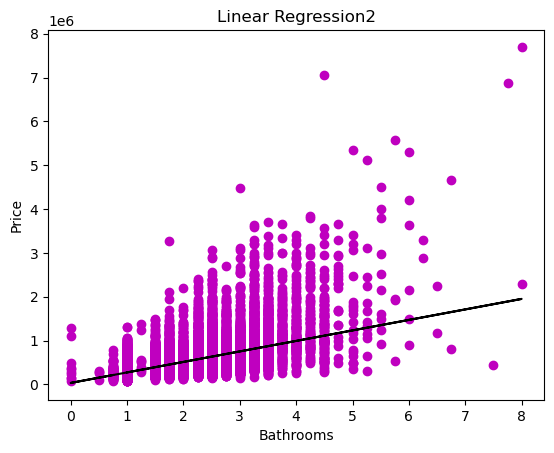

MSE : BTHP 104983061087.48969
R squared : BTHP 0.2831369820478459


In [43]:
x2=data["bathrooms"].values[:,np.newaxis]
y2=data["price"].values

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.45,random_state=45)

BP=LinearRegression()
BP.fit(x2_train,y2_train)
predicted=BP.predict(x2_test)

plt.scatter(x2,y2,color="m")
plt.title("Linear Regression2")
plt.ylabel("Price")
plt.xlabel("Bathrooms")
plt.plot(x2,BP.predict(x2),color="k")
plt.show()

print("MSE : BTHP", mean_squared_error(y2_test,predicted))
print("R squared : BTHP", metrics.r2_score(y2_test,predicted))

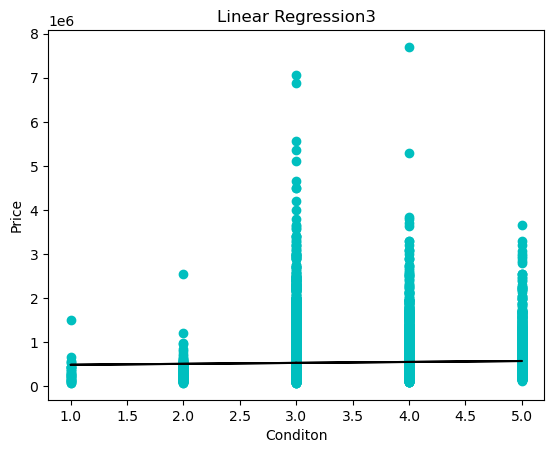

MSE : CP 146310856283.82877
R squared : CP 0.0009355708595547574


In [44]:
x3=data["condition"].values[:,np.newaxis]
y3=data["price"].values

x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.45,random_state=45)

CP=LinearRegression()
CP.fit(x3_train,y3_train)
predicted=CP.predict(x3_test)

plt.scatter(x3,y3,color="c")
plt.title("Linear Regression3")
plt.ylabel("Price")
plt.xlabel("Conditon")
plt.plot(x3,CP.predict(x3),color="k")
plt.show()

print("MSE : CP", mean_squared_error(y3_test,predicted))
print("R squared : CP", metrics.r2_score(y3_test,predicted))

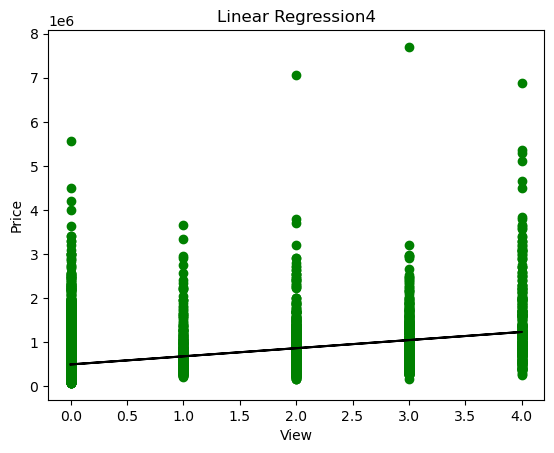

MSE : VP 123969917183.26169
R squared : VP 0.15348773367152535


In [44]:
x4=data["view"].values[:,np.newaxis]
y4=data["price"].values

x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.45,random_state=45)

VP=LinearRegression()
VP.fit(x4_train,y4_train)
predicted=VP.predict(x4_test)

plt.scatter(x4,y4,color="g")
plt.title("Linear Regression4")
plt.ylabel("Price")
plt.xlabel("View")
plt.plot(x4,VP.predict(x4),color="k")
plt.show()

print("MSE : VP", mean_squared_error(y4_test,predicted))
print("R squared : VP", metrics.r2_score(y4_test,predicted))

In [45]:
a=data[["sqft_living","grade"]]
b=data["price"].values
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.45,random_state=45)


SGP=LinearRegression()
SGP.fit(a_train,b_train)
predicted=SGP.predict(a_test)



print("MSE", mean_squared_error(b_test,predicted))
print("R squared", metrics.r2_score(b_test,predicted))

MSE 67283560503.864845
R squared 0.5405630609192189


In [46]:
from sklearn.preprocessing import PolynomialFeatures

p=data[["sqft_living","grade"]]
d=data["price"].values

#splitting data
p_train, p_test, d_train, d_test = train_test_split(p, d, test_size=0.45, random_state=45) 
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

#transforming our input data
p_train_fit = poly.fit_transform(p_train) 
lg.fit(p_train_fit, d_train)
p_test_ = poly.fit_transform(p_test)
predicted = lg.predict(p_test_)


print("MSE: ", metrics.mean_squared_error(d_test, predicted))
print("R squared: ", metrics.r2_score(d_test,predicted))

MSE:  67704239668.24946
R squared:  0.5376905086022407
